**1. IMPORT LIBRARIES**

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

**2. LOAD, READ AND EXPLORE THE DATA**

In [5]:
df= pd.read_csv("BTC-USD (1).csv")

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,10-10-2014,364.687012,375.066986,352.963013,361.562012,361.562012,43665700.0
1,11-10-2014,361.362000,367.191010,355.950989,362.299011,362.299011,13345200.0
2,12-10-2014,362.605988,379.433014,356.144012,378.549011,378.549011,17552800.0
3,13-10-2014,377.920990,397.226013,368.897003,390.414001,390.414001,35221400.0
4,14-10-2014,391.691986,411.697998,391.324005,400.869995,400.869995,38491500.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3566 entries, 0 to 3565
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3566 non-null   object 
 1   Open       3566 non-null   float64
 2   High       3566 non-null   float64
 3   Low        3566 non-null   float64
 4   Close      3566 non-null   float64
 5   Adj Close  3566 non-null   float64
 6   Volume     3566 non-null   float64
dtypes: float64(6), object(1)
memory usage: 195.1+ KB


In [8]:
df.shape

(3566, 7)

**3.DATA PREPROCESSING**

In [9]:
# Check for missing values
print(df.isnull().sum())

# fill or interpolate missing values
df = df.fillna(method='ffill')

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [10]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [11]:
print(df.columns.tolist())
print(df.head())

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
         Date        Open        High         Low       Close   Adj Close  \
0  10-10-2014  364.687012  375.066986  352.963013  361.562012  361.562012   
1  11-10-2014  361.362000  367.191010  355.950989  362.299011  362.299011   
2  12-10-2014  362.605988  379.433014  356.144012  378.549011  378.549011   
3  13-10-2014  377.920990  397.226013  368.897003  390.414001  390.414001   
4  14-10-2014  391.691986  411.697998  391.324005  400.869995  400.869995   

       Volume  
0  43665700.0  
1  13345200.0  
2  17552800.0  
3  35221400.0  
4  38491500.0  


**5. Exploratory Data Analysis (EDA)**

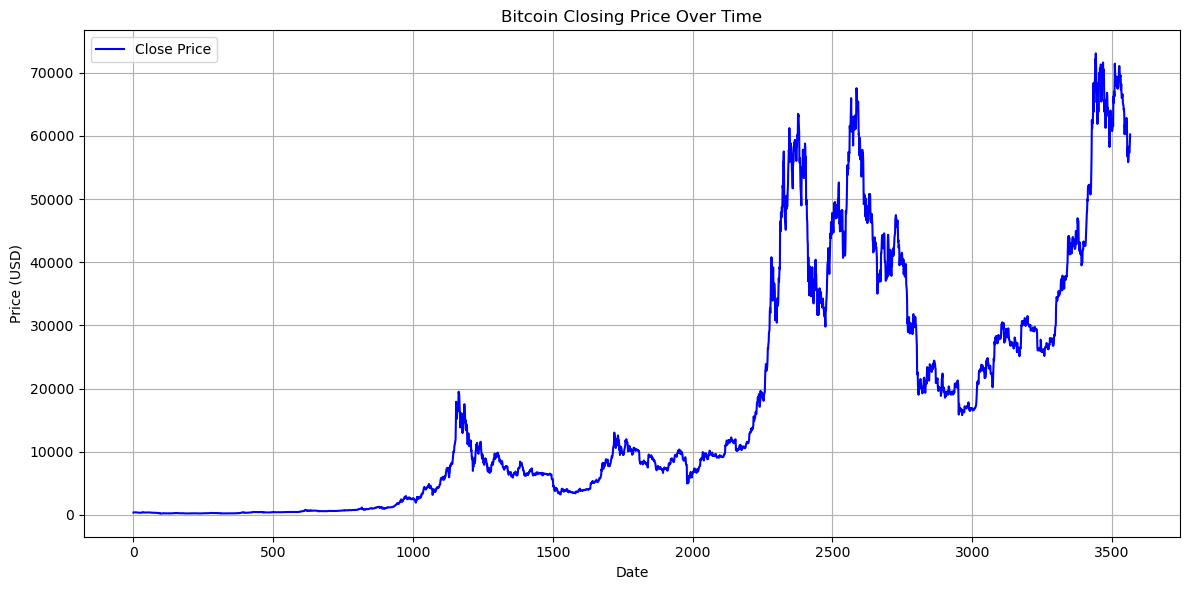

In [12]:
# Plot close price
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

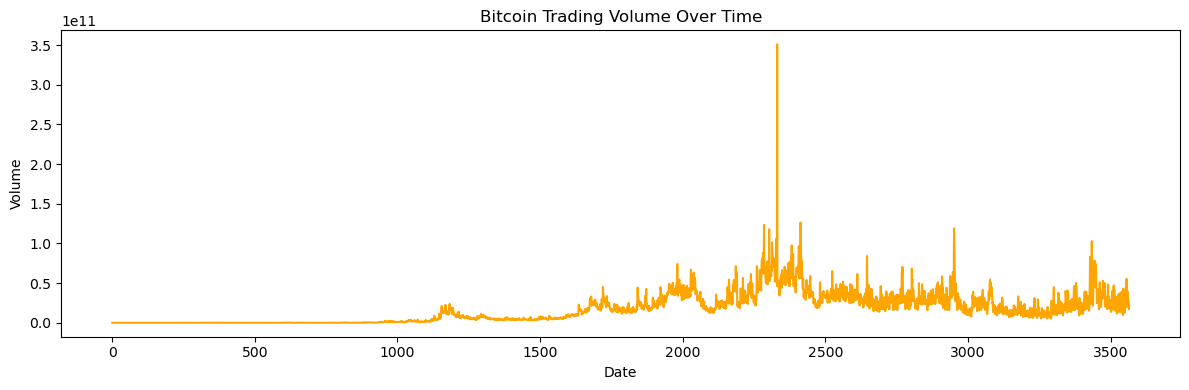

In [13]:
# plot volume
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['Volume'], color='orange')
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

**6. Feature Engineering**

In [14]:
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA21'] = df['Close'].rolling(window=21).mean()
df['Close_diff'] = df['Close'].diff()
df['Returns'] = df['Close'].pct_change()
df['Volatility'] = df['Returns'].rolling(window=7).std()

df = df.dropna()

# Display the first 10 rows with the new features
df[['Close', 'MA7', 'MA21', 'Close_diff', 'Returns', 'Volatility']].head(10)

,Close,MA7,MA21,Close_diff,Returns,Volatility
20,345.304993,350.260433,371.356525,9.713990,0.028946,0.031818
21,338.321014,347.399863,370.249811,-6.983979,-0.020226,0.032226
22,325.748993,344.325291,368.509334,-12.572021,-0.037160,0.033052
23,325.891998,340.209289,366.001857,0.143005,0.000439,0.030748
24,327.553986,336.575714,363.008523,1.661988,0.005100,0.031337
25,330.492004,332.700570,359.657190,2.938018,0.008970,0.030858
26,339.485992,333.256997,357.024475,8.993988,0.027214,0.023979
27,349.290009,333.826285,355.440380,9.804017,0.028879,0.023966
28,342.415009,334.411142,353.471667,-6.875000,-0.019683,0.023883
29,345.488007,337.231001,351.283382,3.072998,0.008974,0.016516


In [15]:
# Price percentage change (daily returns)
df['Pct_Change'] = df['Close'].pct_change()

# Rolling mean (moving averages)
df['MA_7'] = df['Close'].rolling(window=7).mean()       # 7-day moving average
df['MA_21'] = df['Close'].rolling(window=21).mean()     # 21-day moving average

# Rolling standard deviation (volatility)
df['Volatility_7'] = df['Pct_Change'].rolling(window=7).std()   # 7-day volatility
df['Volatility_21'] = df['Pct_Change'].rolling(window=21).std() # 21-day volatility

# Rolling max and min prices
df['Rolling_Max_7'] = df['High'].rolling(window=7).max()
df['Rolling_Min_7'] = df['Low'].rolling(window=7).min()

# Drop NaN rows created by rolling windows
df = df.dropna()

# Display first rows to verify
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA7,MA21,Close_diff,Returns,Volatility,Pct_Change,MA_7,MA_21,Volatility_7,Volatility_21,Rolling_Max_7,Rolling_Min_7
41,20-11-2014,380.307007,382.024994,356.781006,357.839996,357.839996,25233200.0,380.404851,363.319047,-22.714997,-0.059689,0.036976,-0.059689,380.404851,363.319047,0.036976,0.045470,419.252014,356.781006
42,21-11-2014,357.878998,357.878998,344.112000,350.847992,350.847992,29850100.0,373.694851,363.915570,-6.992004,-0.019539,0.034156,-0.019539,373.694851,363.915570,0.034156,0.045453,410.199005,344.112000
43,22-11-2014,351.604004,364.841003,350.877991,352.920013,352.920013,15273000.0,370.378710,365.209428,2.072021,0.005906,0.030633,0.005906,370.378710,365.209428,0.030633,0.044528,410.199005,344.112000
44,23-11-2014,353.174988,370.845001,353.174988,367.572998,367.572998,15151600.0,367.477426,367.194237,14.652985,0.041519,0.033018,0.041519,367.477426,367.194237,0.033018,0.045227,410.199005,344.112000
45,24-11-2014,366.947998,387.209015,366.669006,376.901001,376.901001,30930100.0,365.976427,369.544095,9.328003,0.025377,0.035272,0.025377,365.976427,369.544095,0.035272,0.045407,392.402008,344.112000


In [16]:
df['Pct_Change'] = df['Close'].pct_change() * 100  # Percentage change

df['Rolling_Mean_7'] = df['Close'].rolling(window=7).mean()
df['Rolling_Mean_30'] = df['Close'].rolling(window=30).mean()
df['Rolling_Std_7'] = df['Close'].rolling(window=7).std()
df['Rolling_Std_30'] = df['Close'].rolling(window=30).std()

# Drop rows with NaNs created by rolling calculations
df.dropna(inplace=True)

# Check if columns exist
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA7',
       'MA21', 'Close_diff', 'Returns', 'Volatility', 'Pct_Change', 'MA_7',
       'MA_21', 'Volatility_7', 'Volatility_21', 'Rolling_Max_7',
       'Rolling_Min_7', 'Rolling_Mean_7', 'Rolling_Mean_30', 'Rolling_Std_7',
       'Rolling_Std_30'],
      dtype='object')


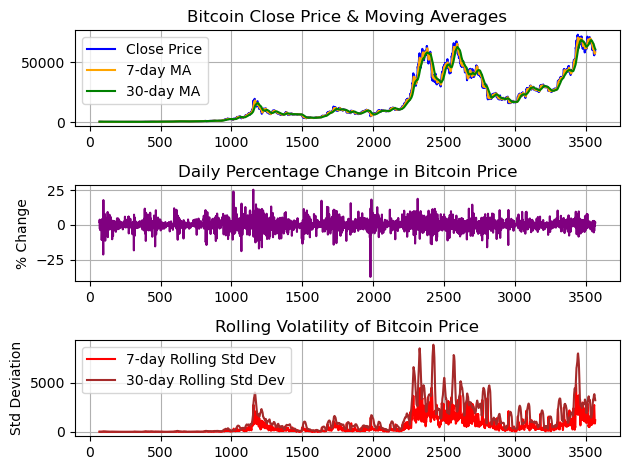

In [17]:
# Plot 1: Closing Price with Rolling Means
plt.subplot(3, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['Rolling_Mean_7'], label='7-day MA', color='orange')
plt.plot(df.index, df['Rolling_Mean_30'], label='30-day MA', color='green')
plt.title('Bitcoin Close Price & Moving Averages')
plt.legend()
plt.grid(True)

# Plot 2: Percentage Price Change
plt.subplot(3, 1, 2)
plt.plot(df.index, df['Pct_Change'], label='Daily % Change', color='purple')
plt.title('Daily Percentage Change in Bitcoin Price')
plt.ylabel('% Change')
plt.grid(True)

# Plot 3: Rolling Volatility (Std Dev)
plt.subplot(3, 1, 3)
plt.plot(df.index, df['Rolling_Std_7'], label='7-day Rolling Std Dev', color='red')
plt.plot(df.index, df['Rolling_Std_30'], label='30-day Rolling Std Dev', color='brown')
plt.title('Rolling Volatility of Bitcoin Price')
plt.ylabel('Std Deviation')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**7. Stationarity Check (ADF Test)**

In [18]:
result = adfuller(df['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -1.1104801530549901
p-value: 0.7108744967247704


**8. Model 1: SARIMA (Time Series)**

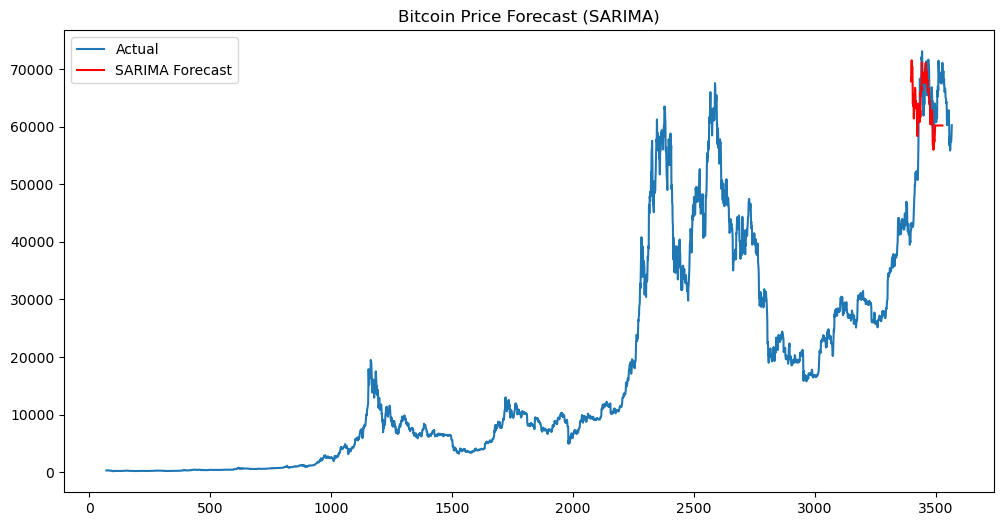

In [19]:
# Define SARIMA model
sarima_model = SARIMAX(df['Close'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
sarima_result = sarima_model.fit(disp=False)

# Forecast
forecast = sarima_result.predict(start=len(df)-100, end=len(df)+30, dynamic=False)

# Plot forecast
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='SARIMA Forecast', color='red')
plt.legend()
plt.title("Bitcoin Price Forecast (SARIMA)")
plt.show()

 **9. Model 2: Gradient Boosting (Machine Learning)**

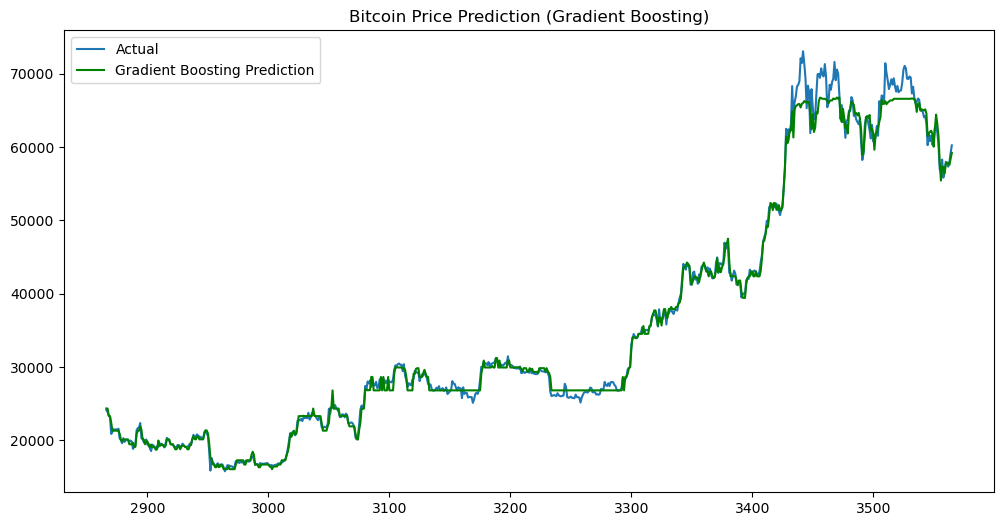

In [20]:
# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'MA7', 'MA21', 'Volatility']
target = 'Close'

X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit model
gbr = GradientBoostingRegressor()
gbr.fit(X_train_scaled, y_train)

# Predictions
y_pred = gbr.predict(X_test_scaled)

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Gradient Boosting Prediction', color='green')
plt.legend()
plt.title("Bitcoin Price Prediction (Gradient Boosting)")
plt.show()

**10. Model 3: ARIMA (AutoRegressive Integrated Moving Average)**

In [31]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(df['Close'], order=(5,1,0))
arima_result = arima_model.fit()
arima_forecast = arima_result.predict(start=len(df)-100, end=len(df)+30)
rmse_arima = np.sqrt(mean_squared_error(df['Close'].iloc[-100:], arima_forecast[:100]))
print(f"RMSE - ARIMA: {rmse_arima:.2f}")

RMSE - ARIMA: 1550.92


In [32]:
df.index = pd.to_datetime(df.index)

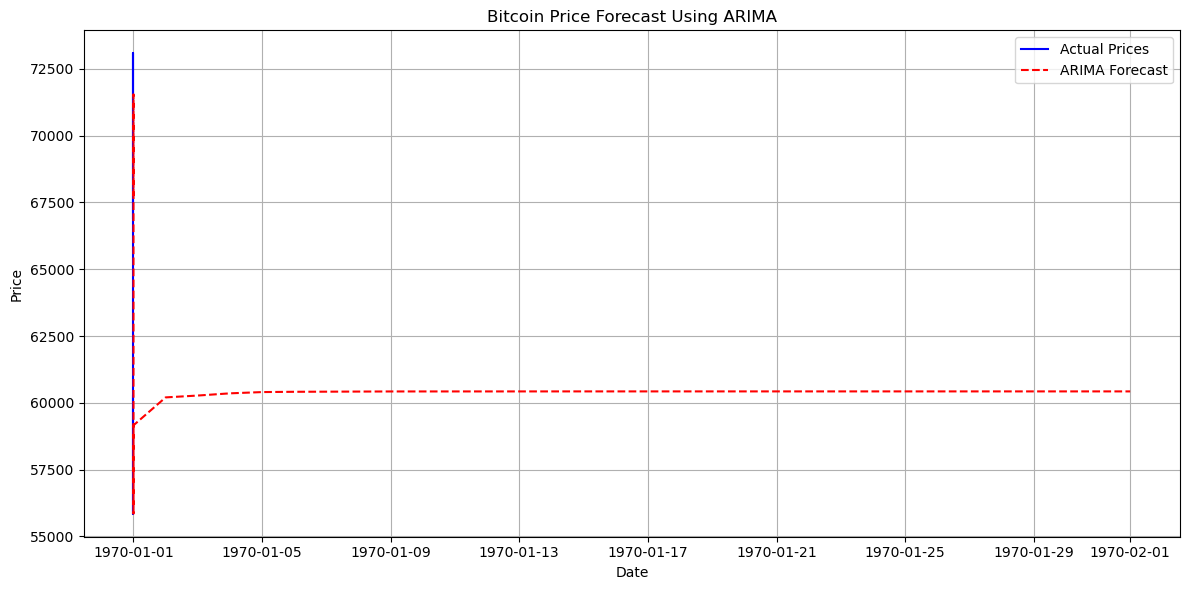

In [36]:
actual = df['Close'].iloc[-100:]

# Forecast length
forecast_length = len(arima_forecast)

# Create a combined index: 100 actual + 31 future = 131
# Use df's actual index + future dummy dates
actual_index = df.index[-100:]
future_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_length - 100)

# Combine actual and forecast index
forecast_index = actual_index.tolist() + future_index.tolist()

# Create the forecast series with corrected index
combined_forecast = pd.Series(arima_forecast.values, index=forecast_index)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Close'].iloc[-130:], label='Actual Prices', color='blue')  # last 130 actual values
plt.plot(combined_forecast, label='ARIMA Forecast', color='red', linestyle='--')
plt.title("Bitcoin Price Forecast Using ARIMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**11. PERFORMANCE EVALUATION**

In [42]:
# Align test targets
y_test = df['Close'].iloc[-100:]

# Align predictions
arima_preds_aligned = arima_forecast[:100]
sarima_preds_aligned = forecast[:100]
gbr_preds_aligned = y_pred[:100]  # assuming y_pred is longer

# Calculate RMSEs
rmse_arima = np.sqrt(mean_squared_error(y_test, arima_preds_aligned))
rmse_sarima = np.sqrt(mean_squared_error(y_test, sarima_preds_aligned))
rmse_gbr = np.sqrt(mean_squared_error(y_test, gbr_preds_aligned))

# Print results
print(f"RMSE - ARIMA: {rmse_arima:.2f}")
print(f"RMSE - SARIMA: {rmse_sarima:.2f}")
print(f"RMSE - Gradient Boosting: {rmse_gbr:.2f}")

RMSE - ARIMA: 1550.92
RMSE - SARIMA: 1548.46
RMSE - Gradient Boosting: 45110.62


**12. COMPARISON OF 3 MODELS**

In [43]:
rmse_values = {
    "ARIMA": rmse_arima,
    "SARIMA": rmse_sarima,
    "Gradient Boosting": rmse_gbr
}

# Find the model with the lowest RMSE
best_model_name = min(rmse_values, key=rmse_values.get)
best_rmse = rmse_values[best_model_name]

print(f"\n✅ Best Performing Model: {best_model_name} with RMSE: {best_rmse:.2f}")


✅ Best Performing Model: SARIMA with RMSE: 1548.46


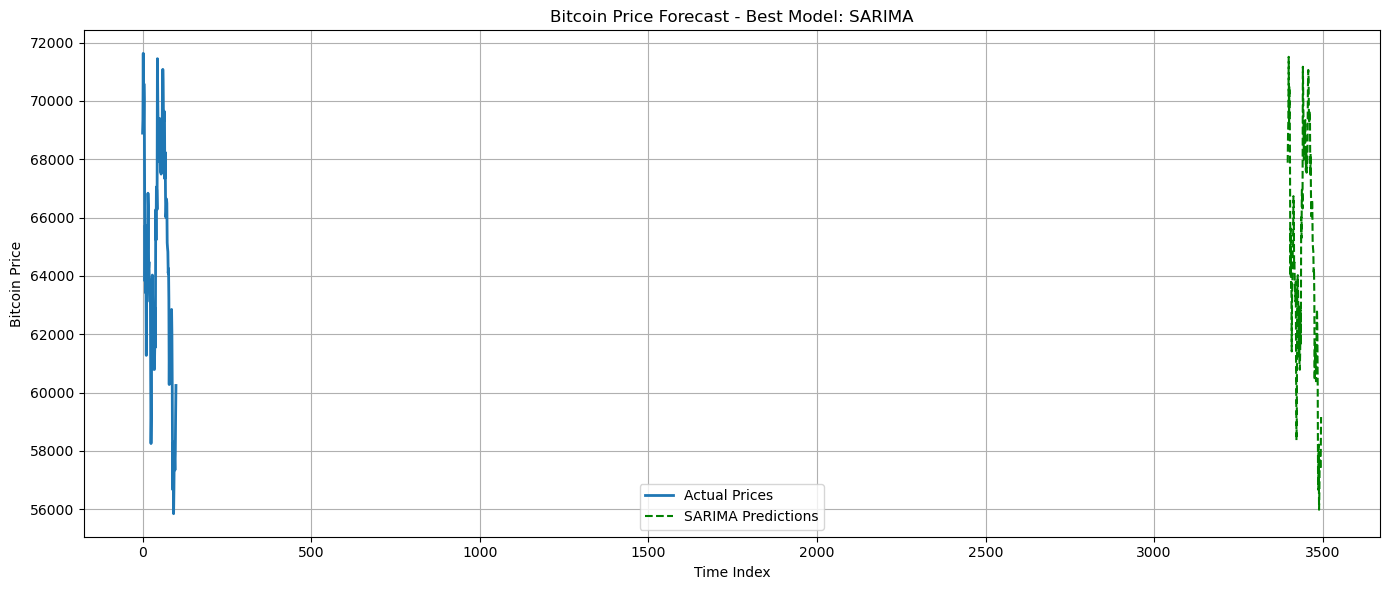

In [45]:

plt.figure(figsize=(14, 6))

# Plot actual values
plt.plot(y_test.values, label="Actual Prices", linewidth=2)

# Plot predictions from the best model
if best_model_name == "ARIMA":
    plt.plot(arima_preds_aligned, label="ARIMA Predictions", linestyle='--', color='red')
elif best_model_name == "SARIMA":
    plt.plot(sarima_preds_aligned, label="SARIMA Predictions", linestyle='--', color='green')
elif best_model_name == "Gradient Boosting":
    plt.plot(gbr_preds_aligned, label="Gradient Boosting Predictions", linestyle='--', color='orange')

plt.title(f"Bitcoin Price Forecast - Best Model: {best_model_name}")
plt.xlabel("Time Index")
plt.ylabel("Bitcoin Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()